<a href="https://colab.research.google.com/github/prajwalzolage55/Netflix_Data_Analysis-/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

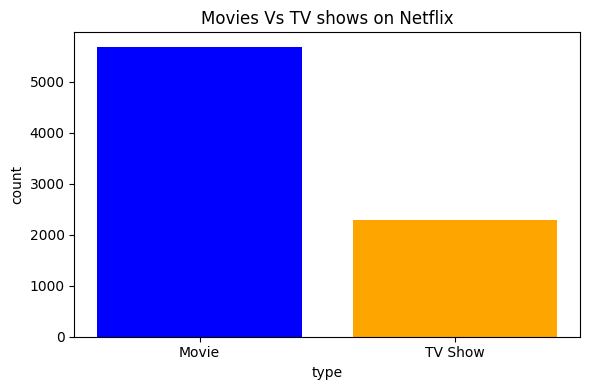

In [ ]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

#loading dataset
df=pd.read_csv('netflix_titles.csv')
df=df.dropna(subset=['type','release_year','rating','country','duration'])

#Movies Vs TV shows
type_count=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_count.index,type_count.values,color=['blue','orange'])
plt.xlabel('type')
plt.ylabel('count')
plt.title("Movies Vs TV shows on Netflix")
plt.tight_layout()
plt.savefig('Movies_Vs_tvshows.png')
plt.show()

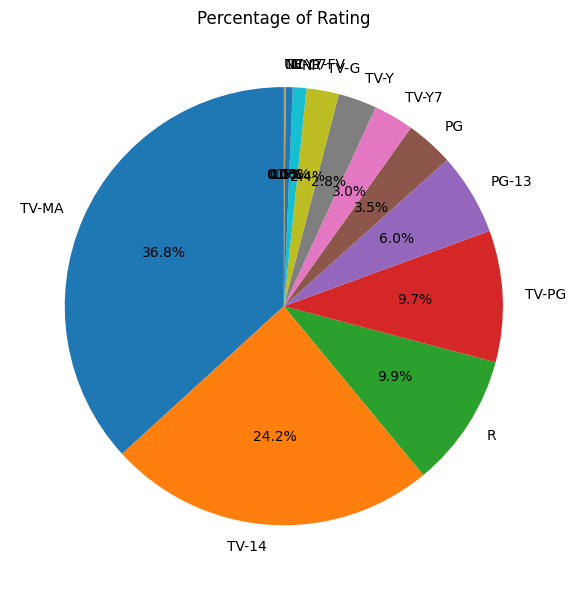

In [ ]:
rating_count=df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_count,labels=rating_count.index,autopct='%1.1f%%',startangle=90)
plt.title("Percentage of Rating")

plt.tight_layout()
plt.savefig('Rating_pie.png')
plt.show()

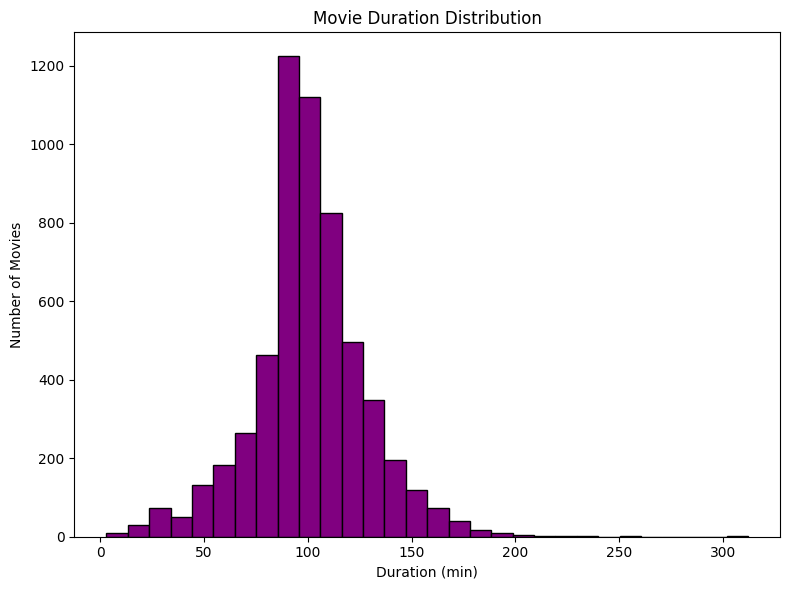

In [ ]:
movie_df=df[df['type']=='Movie'].copy()
movie_df['duration_int']=movie_df['duration'].str.replace('min',' ').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('Movie_duration.png')
plt.show()

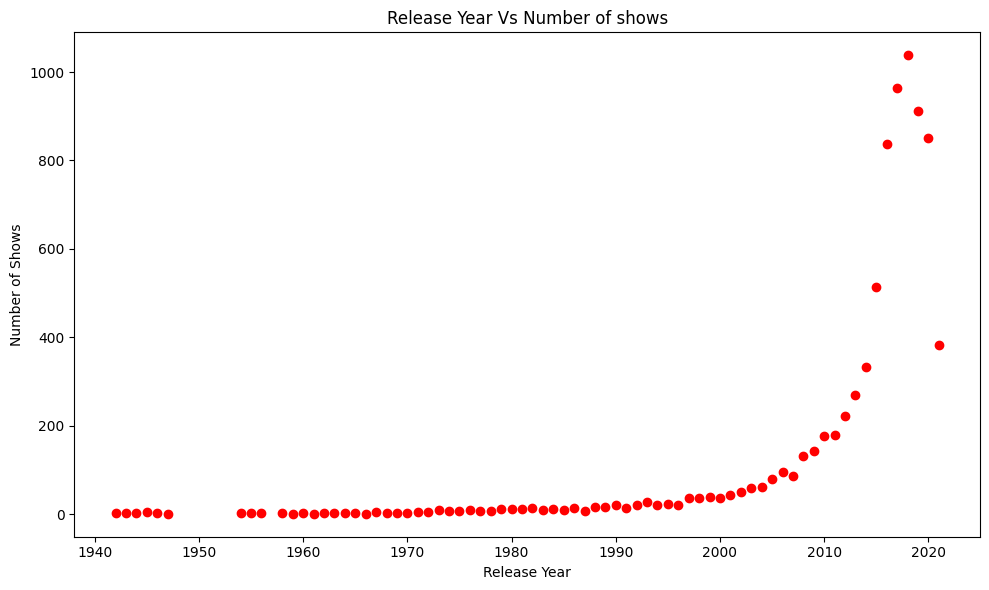

In [ ]:
release_count=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_count.index,release_count.values,color='red')
plt.title('Release Year Vs Number of shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('Release_Year_scatter.png')
plt.show()

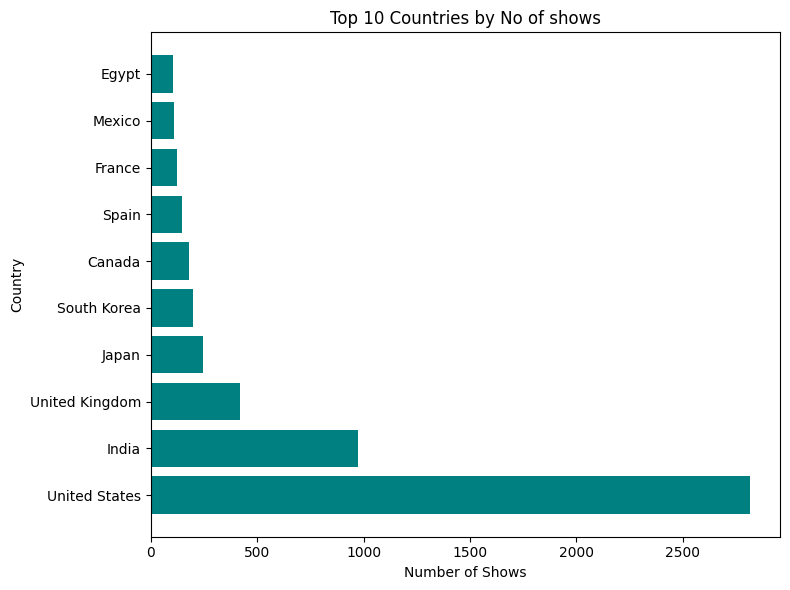

In [ ]:
country_count=df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_count.index,country_count.values,color='teal')
plt.title('Top 10 Countries by No of shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('Top10_countries.png')
plt.show()

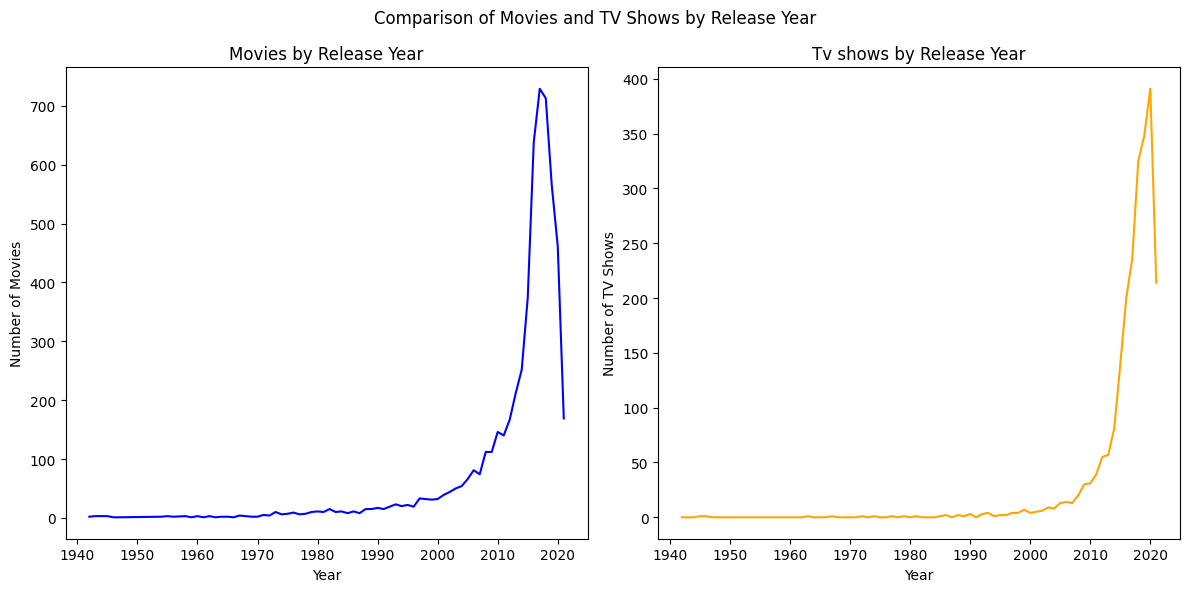

In [ ]:
content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0)

fig, ax=plt.subplots(1,2,figsize=(12,6))
ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title('Movies by Release Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

ax[1].plot(content_by_year.index,content_by_year['TV Show'],color='orange')
ax[1].set_title('Tv shows by Release Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

fig.suptitle('Comparison of Movies and TV Shows by Release Year')
plt.tight_layout()
plt.savefig('Content_by_year.png')
plt.show()